# EDA en base al Data Set obtenido luego del proceso ETL / EDA based on the Data Set obtained after the ETL process
## Cargamos librerias / We load libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

## Cargamos los dos Data Set obtenidos en el ETL / We load the two Data Set obtained in the ETL
#### (La diferencia es que uno no contiene las columnas de genero) / (The difference is that one does not contain the gender columns) 

In [2]:
df = pd.read_csv('Dataset_Final.csv', low_memory=False)
df_numerico = pd.read_csv('Dataset_Final_Numerico.csv', low_memory=False)

### Previsualizamos los Data Frame / We preview the Data Frame

In [3]:

df.head(5)

,title,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,playtime_2weeks,user_url,funny,last_edited,item_id,helpful,recommend,review,posted year,sentiment_score
0,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/id/kube134,NaN,NaN,251990.0,1 of 1 people (100%) found this review helpful,True,It's good to be a magical queen... if you surv...,2014.0,0
1,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,2 people found this review funny,NaN,332800.0,194 of 282 people (69%) found this review helpful,True,10/10 would take kids here for birthday,2014.0,0
2,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,NaN,NaN,319630.0,1 of 2 people (50%) found this review helpful,True,"Well for starters, when I write reviews they a...",2015.0,0
3,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,NaN,NaN,6020.0,No ratings yet,True,10/10 lets you cut people into sushi if the pr...,2015.0,2
4,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,NaN,NaN,55230.0,No ratings yet,True,"10/10 has Sasha Grey, so fun for whole family.",2015.0,0


In [4]:

df_numerico.head(2)

,year,items_count,playtime_forever,playtime_2weeks,item_id,posted year,sentiment_score
0,1998,476,4,0,251990.0,2014.0,0
1,1998,75,21,0,332800.0,2014.0,0


## TOP 25 TITULOS MAS COMUNES / TOP 25 MOST COMMON TITLES

### Obtenemos los 25 titulos más comunes / We obtain the 25 most common titles


In [5]:

top_titles = df['title'].value_counts().nlargest(25)

### Creamos el grafico de barras / We create the bar graph

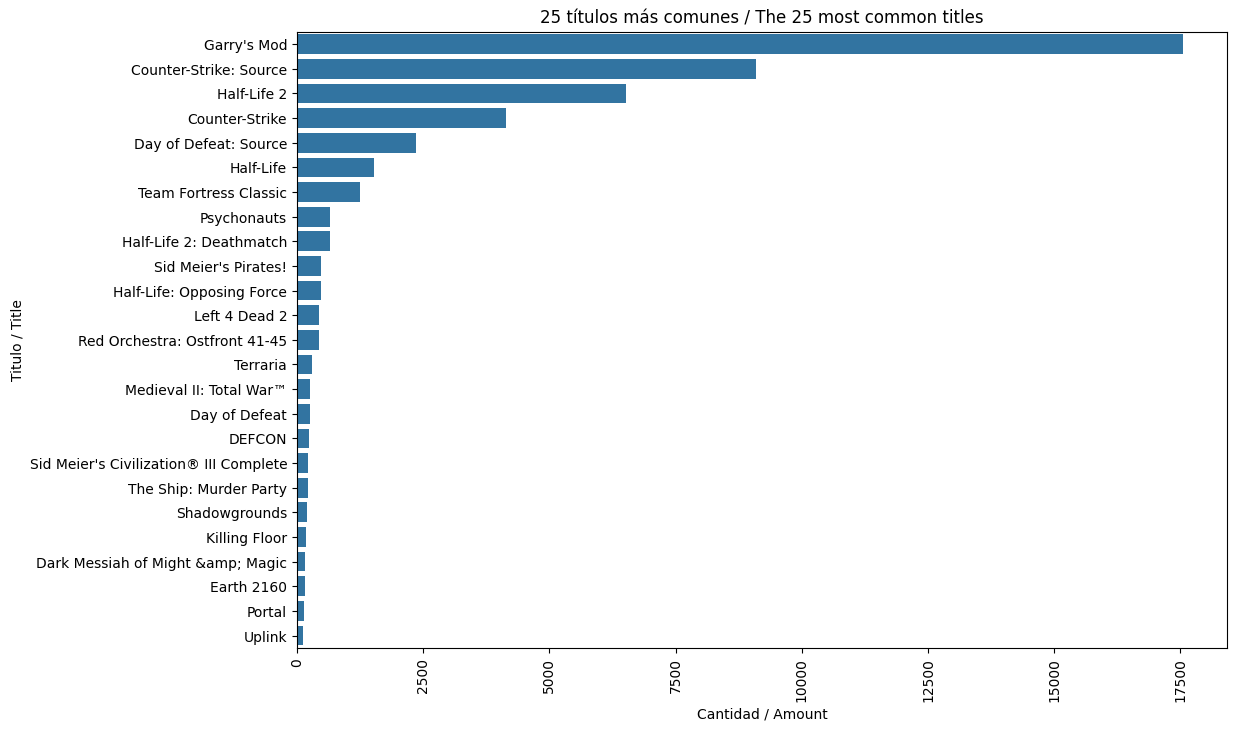

In [6]:

plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Cantidad / Amount')
plt.ylabel('Titulo / Title')
plt.title('25 títulos más comunes / The 25 most common titles')
plt.xticks(rotation=90)
plt.show()

## Grafico de Dispersion de Horas de Juego vs Año / Scatter Plot of Playtime vs Year

### Creacion del Grafico de Dispersion y personalizacion del mismo  / Creation of the Scatter Plot and customization of it.

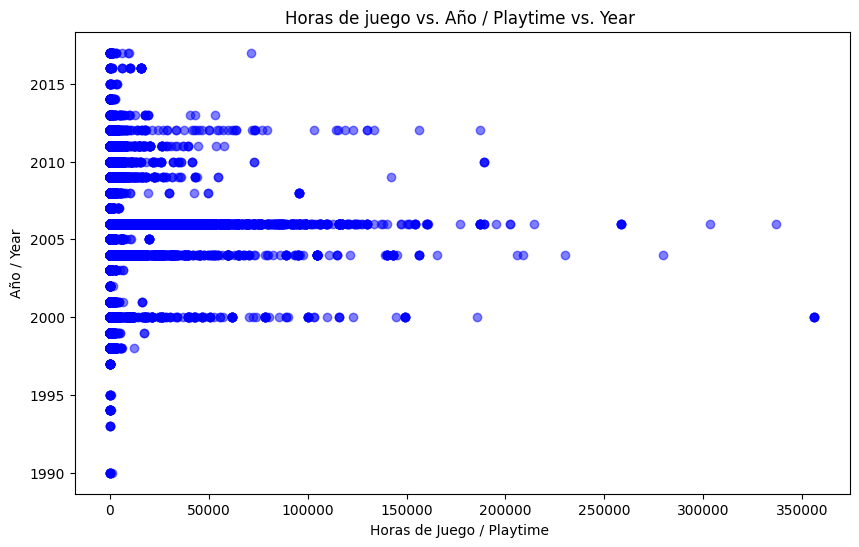

In [7]:
plt.figure(figsize=(10, 6))

# creacion del grafico de dispersion / creation of the scatter plot
plt.scatter(df['playtime_forever'], df['year'], color='blue', alpha=0.5)

# Agrega etiquetas y titulos / Add tags and titles
plt.title('Horas de juego vs. Año / Playtime vs. Year ')
plt.xlabel('Horas de Juego / Playtime ')
plt.ylabel('Año / Year');

##  Grafico de Barras Sentiment score por año de publicacion / Bar Graph Sentiment score by posted year

### Agrupamos las columnas 'posted year´ y 'sentiment_score' y contamos   / Group the data by 'posted year' and 'sentiment_score' and count the occurrences

In [8]:
grouped_data = df.groupby(['posted year', 'sentiment_score']).size().reset_index(name='count')

### Pivotamos los datos datos de ' sentiment_score como una columna ' / Pivot the data to have 'sentiment_score' as columns

In [9]:
pivot_data = grouped_data.pivot(index='posted year', columns='sentiment_score', values='count')


### Graficamos / We graph

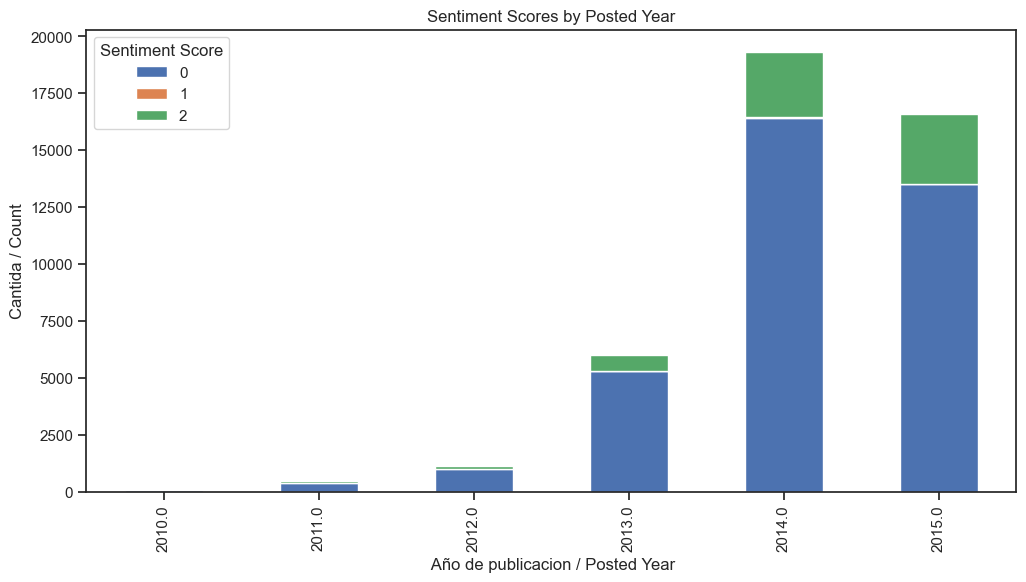

In [10]:

sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel(' Año de publicacion / Posted Year')
plt.ylabel('Cantida / Count')
plt.title('Sentiment Scores by Posted Year')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()

## Horas Jugadas por Año y genero / Hours Played by Year and Gender

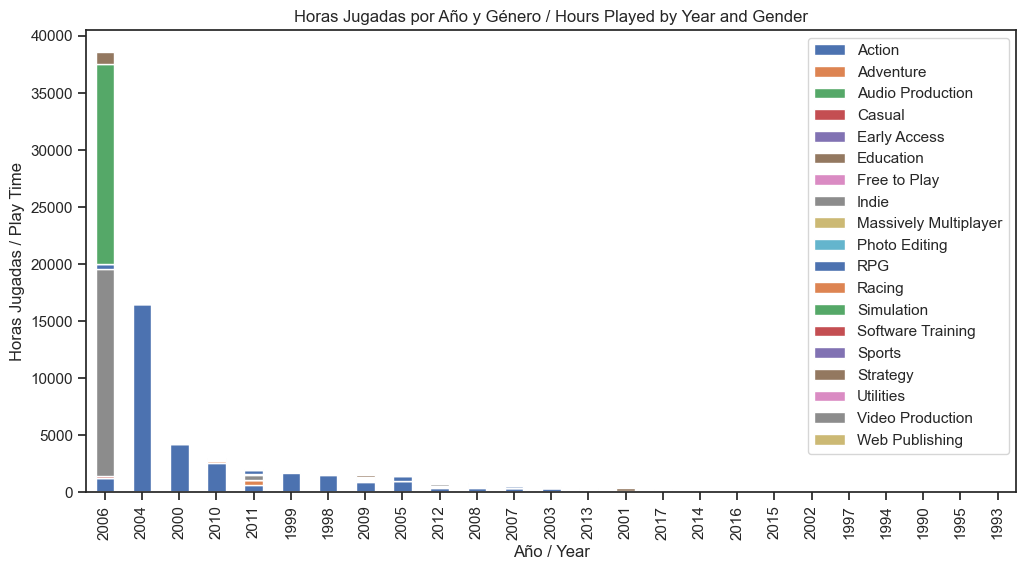

In [11]:
genres = ['Action', 'Adventure', 'Audio Production', 'Casual',
             'Early Access', 'Education', 'Free to Play', 'Indie',
             'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
             'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']

relevant_columns = ['year', 'playtime_forever'] + genres
df_filtered = df[relevant_columns].copy()

df_grouped = df_filtered.groupby('year')[genres].sum()
df_grouped['total_playtime'] = df_grouped[genres].sum(axis=1)
df_grouped = df_grouped.sort_values('total_playtime', ascending=False)
df_filtered = df[(df['year'] >= 2001) & (df['year'] <= 2006)][relevant_columns].copy()

df_grouped[genres].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Año / Year')
plt.ylabel('Horas Jugadas / Play Time')
plt.title('Horas Jugadas por Año y Género / Hours Played by Year and Gender')
plt.legend(loc='upper right')
plt.show()

## Mapa de correlacion /  Correlation map


### Creacion del mapa de correlacion / Creation of the correlation map
#### Aca utilizamos el data frame con solo datos numericos / Here I use the data frame with only numerical data

<Axes: >

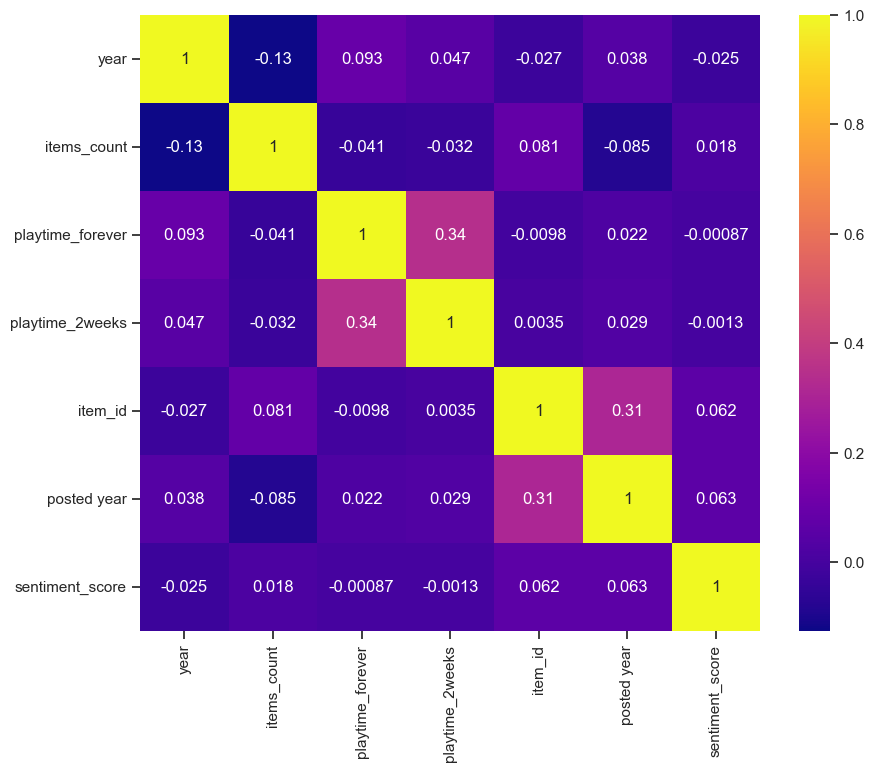

In [12]:
corr_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='plasma')